# 計算凱融的EoM

In [1]:
from sympy import *
from sympy.physics.vector import dynamicsymbols

qH, qK = dynamicsymbols('q_H q_K')
dqH, dqK = dynamicsymbols('q_H q_K',1)
ddqH, ddqK = dynamicsymbols('q_H q_K',2)

mT, mS, lT, lTC, lS, lSC, IT, IS, t, g = symbols('m_T  m_S  l_T  l_{TC}  l_S  l_{SC}  I_T  I_S  t  g')

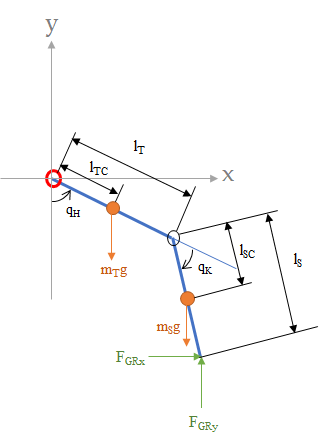

### 計算位移向量

定義基底向量為$\begin{bmatrix} \hat{x}  \\  \hat{y}  \end{bmatrix}$

* 質心$m_T$的位移向量$\mathbf{r}_T = \begin{bmatrix} l_{TC} \sin{q_H}  \\  -l_{TC} \cos{q_H}  \end{bmatrix}$

* 質心$m_S$的位移向量$\mathbf{r}_S = \begin{bmatrix} 
l_{T} \sin{q_H}  + l_{SC} \sin{q_H - q_K}
\\    
-l_{T} \cos{q_H}  - l_{SC} \cos{q_H - q_K}
\end{bmatrix}$

In [2]:
rT = Matrix([[lTC*sin(qH)], 
             [-lTC*cos(qH)]])

rS = Matrix([[lT*sin(qH) + lSC*sin(qH - qK)], 
             [-lT*cos(qH) - lSC*cos(qH - qK)]])

### 計算速度向量

In [3]:
vT = diff(rT, t)
vS = diff(rS, t)

### 計算角速度

In [4]:
wT = diff(qH, t)
wS = diff(qH-qK, t)

### 計算動能、位能、Lagrangian

In [5]:
Ke = mT*vT.T.dot(vT)/2 + mS*vS.T.dot(vS)/2 + IT*wT**2/2 + IS*wS**2/2
Pe = mT*g*rT[1] + mS*g*rS[1]

Lang = Ke-Pe

In [6]:
from sympy.physics.mechanics import LagrangesMethod

LM = LagrangesMethod(Lang, [qH, qK])

In [7]:
LM_Lagrange_eq = simplify(LM.form_lagranges_equations())
LM_Lagrange_eq

Matrix([
[I_S*(Derivative(q_H(t), (t, 2)) - Derivative(q_K(t), (t, 2))) + I_T*Derivative(q_H(t), (t, 2)) + g*l_{TC}*m_T*sin(q_H(t)) + g*m_S*(l_T*sin(q_H(t)) + l_{SC}*sin(q_H(t) - q_K(t))) + l_{TC}**2*m_T*Derivative(q_H(t), (t, 2)) + m_S*(l_T**2*Derivative(q_H(t), (t, 2)) - 2*l_T*l_{SC}*sin(q_K(t))*Derivative(q_H(t), t)*Derivative(q_K(t), t) + l_T*l_{SC}*sin(q_K(t))*Derivative(q_K(t), t)**2 + 2*l_T*l_{SC}*cos(q_K(t))*Derivative(q_H(t), (t, 2)) - l_T*l_{SC}*cos(q_K(t))*Derivative(q_K(t), (t, 2)) + l_{SC}**2*Derivative(q_H(t), (t, 2)) - l_{SC}**2*Derivative(q_K(t), (t, 2)))],
[                                                                                                                                                                                                                                                                               -I_S*Derivative(q_H(t), (t, 2)) + I_S*Derivative(q_K(t), (t, 2)) - g*l_{SC}*m_S*sin(q_H(t) - q_K(t)) + l_T*l_{SC}*m_S*sin(q_K(t))*Derivative(q_H(t),

In [8]:
LM_MassMatrix = simplify(LM.mass_matrix);
LM_MassMatrix

Matrix([
[I_S + I_T + l_{TC}**2*m_T + m_S*(l_T**2 + 2*l_T*l_{SC}*cos(q_K(t)) + l_{SC}**2), -I_S - l_{SC}*m_S*(l_T*cos(q_K(t)) + l_{SC})],
[                                   -I_S - l_{SC}*m_S*(l_T*cos(q_K(t)) + l_{SC}),                          I_S + l_{SC}**2*m_S]])

In [9]:
LM_TotalForce = -LM.forcing
LM_ForceMatrix = simplify(LM_TotalForce - diff(LM_TotalForce, g)*g)
LM_ForceMatrix

Matrix([
[l_T*l_{SC}*m_S*(-2*Derivative(q_H(t), t) + Derivative(q_K(t), t))*sin(q_K(t))*Derivative(q_K(t), t)],
[                                                l_T*l_{SC}*m_S*sin(q_K(t))*Derivative(q_H(t), t)**2]])

In [10]:
LM_GravityMatrix = simplify(diff(LM_TotalForce,g)*g)
LM_GravityMatrix

Matrix([
[g*(l_{TC}*m_T*sin(q_H(t)) + m_S*(l_T*sin(q_H(t)) + l_{SC}*sin(q_H(t) - q_K(t))))],
[                                              -g*l_{SC}*m_S*sin(q_H(t) - q_K(t))]])